In [13]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt

In [3]:
df=pd.read_excel(r"C:\Users\manir\Downloads\Data science class\Unsupervised\Hierarchical_dataset.xlsx")

In [5]:
df.head()

,University,SAT,Rank,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,60,59,9,25026,72
3,Columbia,1310,76,25,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [6]:
df.describe()

,SAT,Rank,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.280000,39.240000,12.72000,27388.000000,86.720000
std,108.359771,19.816912,19.696193,4.06735,14424.883165,9.057778
min,1005.000000,25.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   University  25 non-null     object
 1   SAT         25 non-null     int64 
 2   Rank        25 non-null     int64 
 3   Accept      25 non-null     int64 
 4   SFRatio     25 non-null     int64 
 5   Expenses    25 non-null     int64 
 6   GradRate    25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [8]:
#Normalization function

def normalization_function(num):
    x=(num-num.min())/(num.max()-num.min())
    return x

In [9]:
# Normalizing the dataframe

df_norm=normalization_function(df.iloc[:,1:])
df_norm.describe()

,SAT,Rank,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.683733,0.332105,0.353684,0.340508,0.657333
std,0.264292,0.264225,0.259160,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.653333,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.746667,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.866667,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# creating Dendrogram

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

z=linkage(df_norm, method='complete', metric='euclidean')

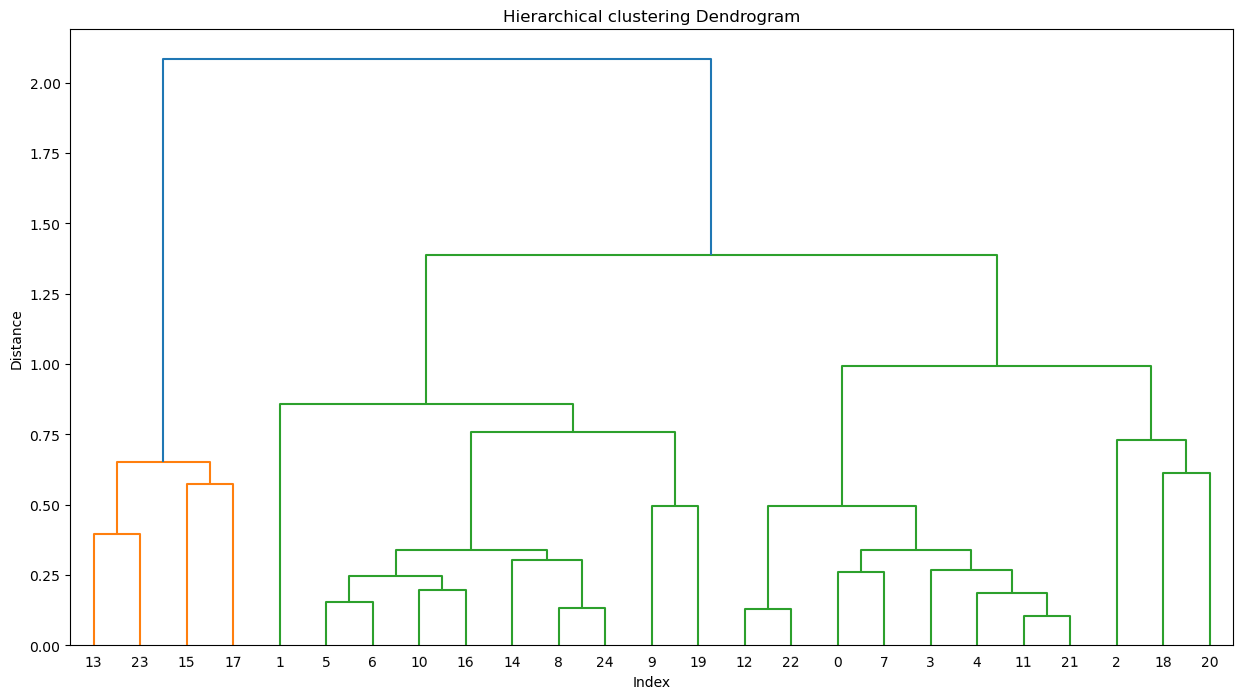

In [20]:
#Dendrogram

plt.figure(figsize=(15,8));
plt.title('Hierarchical clustering Dendrogram');
plt.xlabel('Index')
plt.ylabel('Distance')

sch.dendrogram(z, leaf_rotation=1, # rotates the x axis label
              leaf_font_size=10) #front size for the x axis label)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
h_complete=cluster.fit(df_norm)

In [25]:
h_complete.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [28]:
#creating the new column cluster & assign the label to the cluster column
cluster_label=pd.Series(h_complete.labels_)
df['cluster']=cluster_label     

In [29]:
df.head()

,University,SAT,Rank,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,60,59,9,25026,72,0
3,Columbia,1310,76,25,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [30]:
df1=df.iloc[:,[7,0,1,2,3,4,5,6]]
df1.head()

,cluster,University,SAT,Rank,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,60,59,9,25026,72
3,0,Columbia,1310,76,25,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [33]:
# Aggregate mean of each cluster
df1.iloc[:,2:].groupby(df1.cluster).mean()

,SAT,Rank,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1260.0,78.636364,39.272727,12.818182,21446.909091,87.636364
1,1061.5,38.000000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [36]:
df1['cluster'].value_counts()

0    11
2    10
1     4
Name: cluster, dtype: int64

In [34]:
# creating csv file
import os
os.getcwd()
#df1.to_csv('univeristy.csv', encoding='utf-8')

'C:\\Users\\manir\\Downloads\\Data science class\\Unsupervised'